In [1]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import FutureAnalyser as fa
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

pd.options.display.float_format = '{:,.2f}'.format

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioAnalyser as pa

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [2]:
ISINs = ['IE00BGCZ0933', 'IWDA', 'IQQ0']
Nomes = ['VG_GB', 'IWDA', 'IQQ0']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Backtester/Data/Cotacoes_diarias.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()
fundos = fa.normalize(fundos)

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

### Comparação de carteiras "modelo" de ETFs (usando Vanguard Global Bond, IWDA e IQQ0)

In [3]:
pa.print_title('Análise desde ' +  Begin + ' até ' + End)

**Análise desde 2015-03-10 até 2020-05-15**

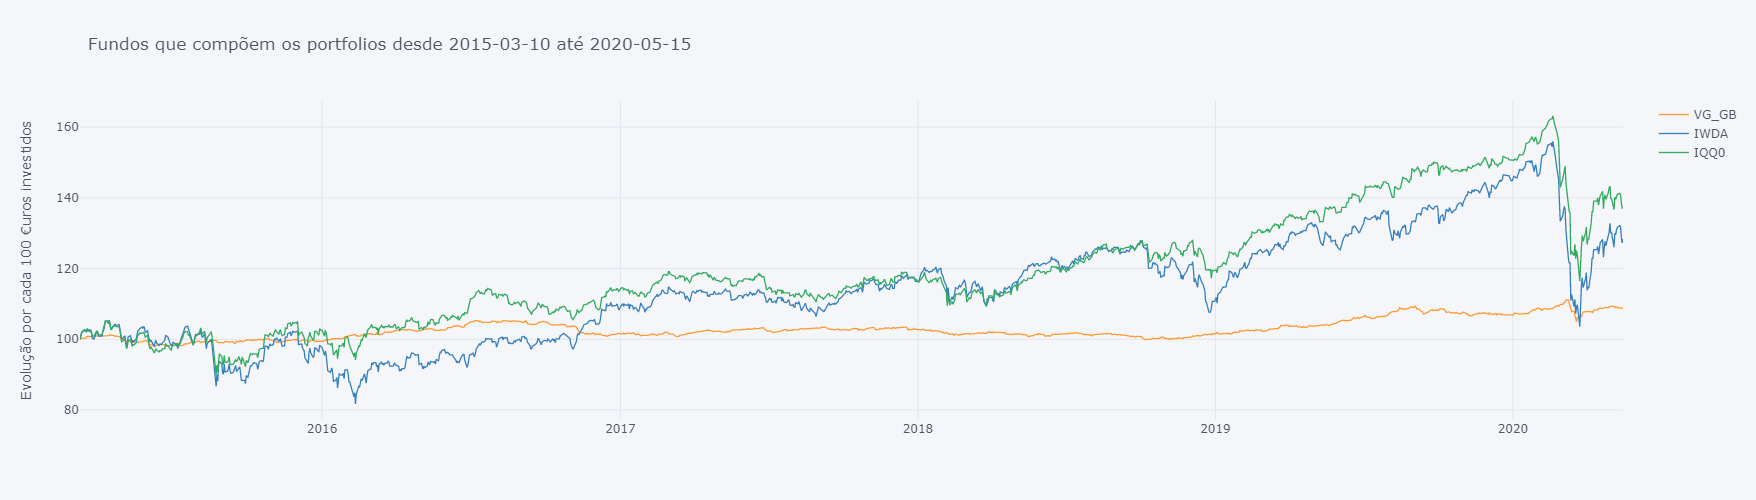

In [4]:
fundos.iplot(dimensions=fa.dimensions, title='Fundos que compõem os portfolios desde ' +  Begin + ' até ' + End,
             yTitle='Evolução por cada 100 €uros investidos')

In [5]:
nr = 0

pa.print_title('Quadro de performance de ' + fundos.columns[nr])
pa.compute_ms_performance_table(fundos[[fundos.columns[nr]]])

**Quadro de performance de VG_GB**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,1.63%,8.77%,2.80%,0.58,-5.57%,0.29
YTD,N/A,1.84%,5.25%,0.95,-5.57%,0.89
1 Year,4.54%,4.57%,3.96%,1.15,-5.57%,0.82
3 Years,2.12%,6.51%,2.92%,0.73,-5.57%,0.38
5 Years,1.81%,9.39%,2.80%,0.65,-5.57%,0.32


In [6]:
nr = 1

pa.print_title('Quadro de performance de ' + fundos.columns[nr])
pa.compute_ms_performance_table(fundos[[fundos.columns[nr]]])

**Quadro de performance de IWDA**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,4.93%,28.33%,17.07%,0.29,-33.63%,0.15
YTD,N/A,-11.36%,35.85%,-0.77,-33.63%,-0.82
1 Year,-0.23%,-0.23%,23.87%,-0.01,-33.63%,-0.01
3 Years,4.12%,12.91%,16.95%,0.24,-33.63%,0.12
5 Years,5.27%,29.28%,17.16%,0.31,-33.63%,0.16


In [7]:
nr = 2

pa.print_title('Quadro de performance de ' + fundos.columns[nr])
pa.compute_ms_performance_table(fundos[[fundos.columns[nr]]])

**Quadro de performance de IQQ0**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,6.27%,37.08%,14.28%,0.44,-28.65%,0.22
YTD,N/A,-9.04%,31.04%,-0.72,-28.65%,-0.78
1 Year,1.31%,1.32%,20.27%,0.06,-28.65%,0.05
3 Years,5.39%,17.09%,14.20%,0.38,-28.65%,0.19
5 Years,6.86%,39.41%,14.31%,0.48,-28.65%,0.24


In [8]:
conservador = pa.compute_portfolio(fundos, [0.7, 0.15, 0.15])
moderado = pa.compute_portfolio(fundos, [0.4, 0.3, 0.3])
agressivo = pa.compute_portfolio(fundos, [0.2, 0.4, 0.4])

portfolios = fa.merge_time_series(conservador, moderado)
portfolios = fa.merge_time_series(portfolios, agressivo)

portfolios.columns = ['Cons.', 'Mod.', 'Agr.'] 

### Portfolios:

- Portfolio Conservador:
    - 15% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 15% IQQ0/MVol (MSCI World Min Vol) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 70% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)
    
    
- Portfolio Moderado:
    - 30% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 30% IQQ0/MVol (MSCI World Min Vol) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 40% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)
    
    
- Portfolio Agressivo:
    - 40% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 40% IQQ0/MVol (MSCI World Min Vol) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 20% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)

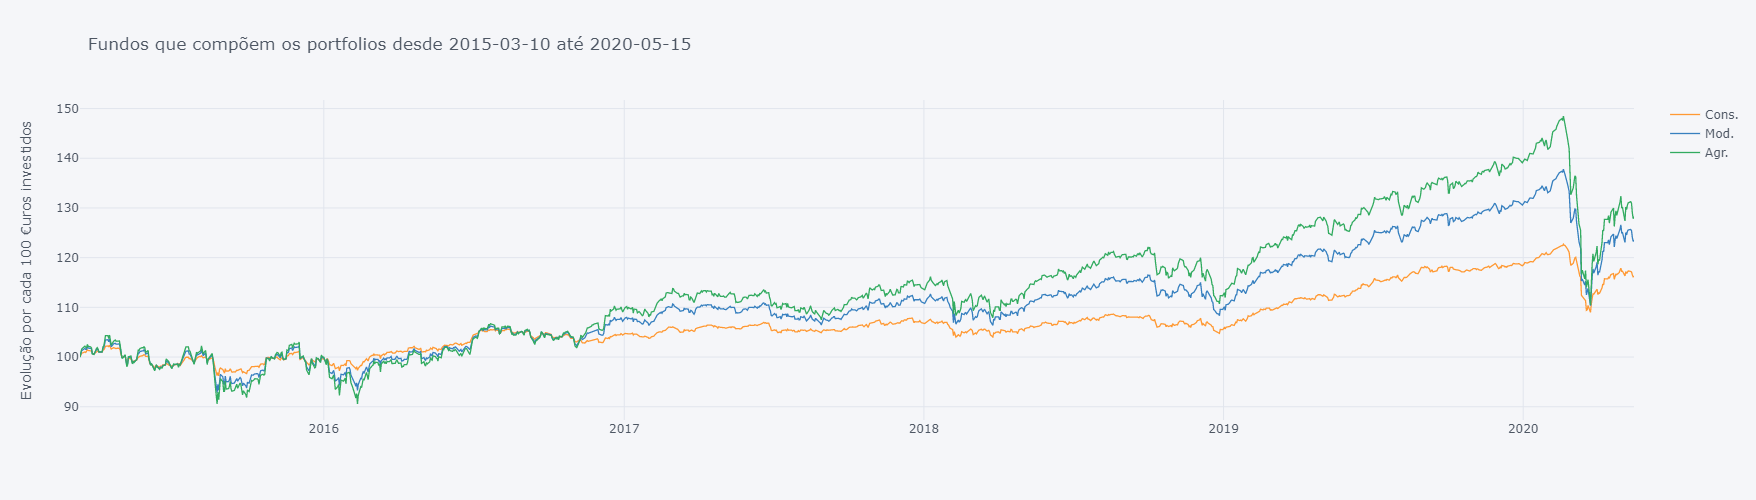

In [9]:
portfolios.iplot(dimensions=fa.dimensions, title='Fundos que compõem os portfolios desde ' +  Begin + ' até ' + End,
             yTitle='Evolução por cada 100 €uros investidos')

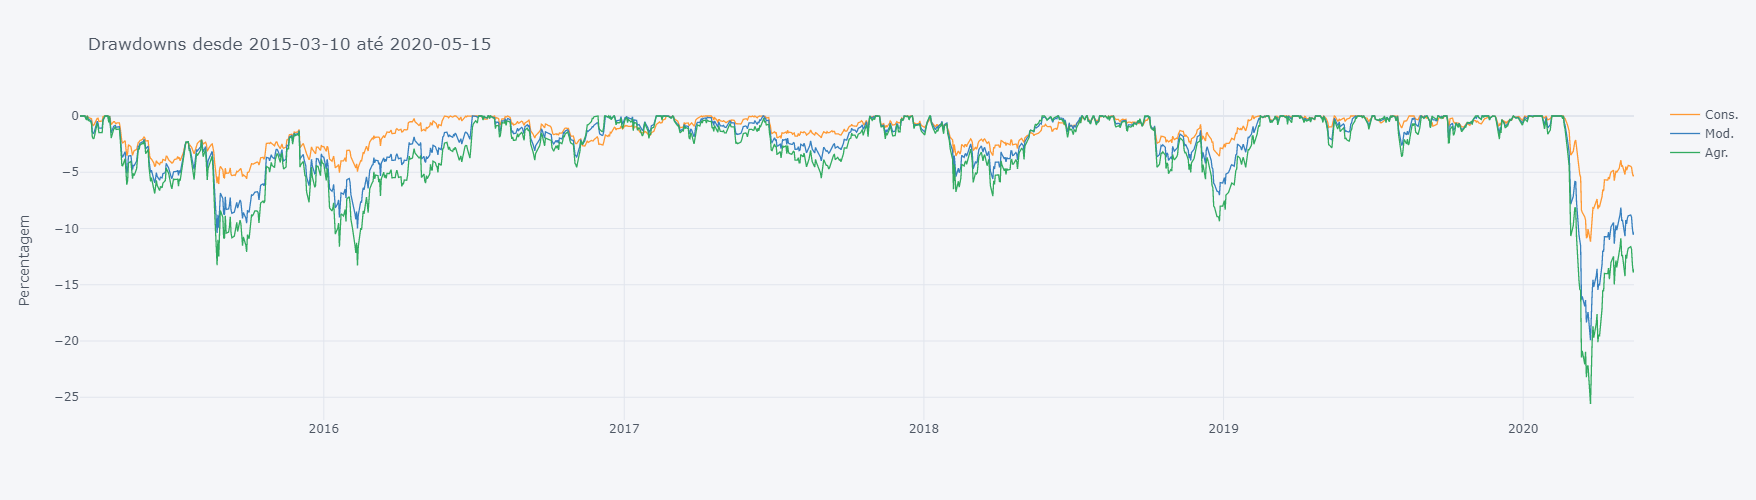

In [10]:
round(fa.compute_drawdowns(portfolios), 2).iplot(dimensions=fa.dimensions, title='Drawdowns desde ' +  Begin + ' até ' + End, yTitle='Percentagem')

In [11]:
pa.print_title('Quadro de performance do portfolio Conservador (70/30)')
pa.compute_ms_performance_table(portfolios[['Cons.']])

**Quadro de performance do portfolio Conservador (70/30)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,2.95%,16.27%,4.73%,0.62,-11.17%,0.26
YTD,N/A,-1.77%,9.70%,-0.48,-11.17%,-0.42
1 Year,3.80%,3.82%,6.49%,0.59,-11.17%,0.34
3 Years,3.12%,9.67%,4.79%,0.65,-11.17%,0.28
5 Years,3.22%,17.16%,4.70%,0.68,-11.17%,0.29


In [12]:
pa.print_title('Quadro de performance do portfolio Moderado (50/50)')
pa.compute_ms_performance_table(portfolios[['Mod.']])

**Quadro de performance do portfolio Moderado (50/50)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,4.16%,23.55%,8.95%,0.47,-19.93%,0.21
YTD,N/A,-5.39%,18.74%,-0.73,-19.93%,-0.69
1 Year,2.65%,2.66%,12.34%,0.21,-19.93%,0.13
3 Years,3.95%,12.33%,8.90%,0.44,-19.93%,0.20
5 Years,4.52%,24.73%,8.95%,0.50,-19.93%,0.23


In [13]:
pa.print_title('Quadro de performance do portfolio Agressivo (20/80)')
pa.compute_ms_performance_table(portfolios[['Agr.']])

**Quadro de performance do portfolio Agressivo (20/80)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,4.92%,28.26%,12.02%,0.41,-25.60%,0.19
YTD,N/A,-7.79%,25.61%,-0.76,-25.60%,-0.76
1 Year,1.68%,1.69%,16.76%,0.10,-25.60%,0.07
3 Years,4.41%,13.83%,11.94%,0.37,-25.60%,0.17
5 Years,5.33%,29.66%,12.05%,0.44,-25.60%,0.21


**Quadro de retornos anuais dos portfolios**

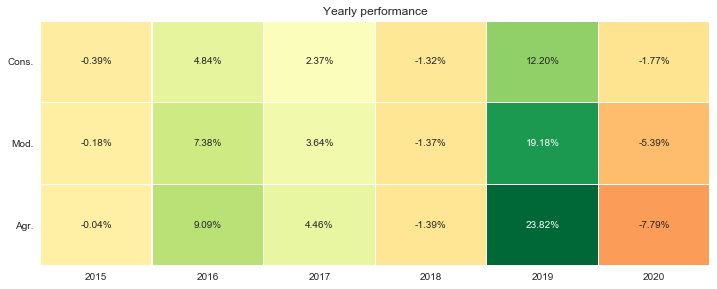

In [14]:
pa.print_title('Quadro de retornos anuais dos portfolios')
fundos_norm = portfolios.copy()

# Resampling to yearly (business year)
yearly_quotes_fundos = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes_fundos = pd.concat([yearly_quotes_fundos.iloc[:1], yearly_quotes_fundos])
yearly_quotes_fundos = pd.concat([pd.DataFrame(fundos_norm.iloc[0]).transpose(), yearly_quotes_fundos.iloc[1:]])

# Returns
yearly_returns_fundos = ((yearly_quotes_fundos / yearly_quotes_fundos.shift(1)) - 1) * 100
yearly_returns_fundos = yearly_returns_fundos.set_index([list(range(fundos_norm.index[0].year - 1, fundos_norm.index[-1].year + 1))]).drop(fundos_norm.index[0].year - 1)

# Calcular em valores percentuais
yearly_returns_fundos = yearly_returns_fundos / 100

# Sns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(12, 4.5)

ax = sns.heatmap(yearly_returns_fundos.transpose(), annot=True, cmap="RdYlGn", linewidths=.2, cbar=False, center=0.02, fmt='.2%')
plt.yticks(rotation=360)
plt.title('Yearly performance')
plt.show()

### Questão: Posso usar o IGGH/EUNA (iShares Core Global Aggregate Bond UCITS ETF) em vez do Vanguard Global bond index fund (IE00BGCZ0933)?

In [15]:
ISINs = ['IE00BGCZ0933', 'AGGH_oficial']
Nomes = ['VG_GB', 'AGGH']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()
fundos = fa.normalize(fundos.loc[:'2020-04-30'])

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

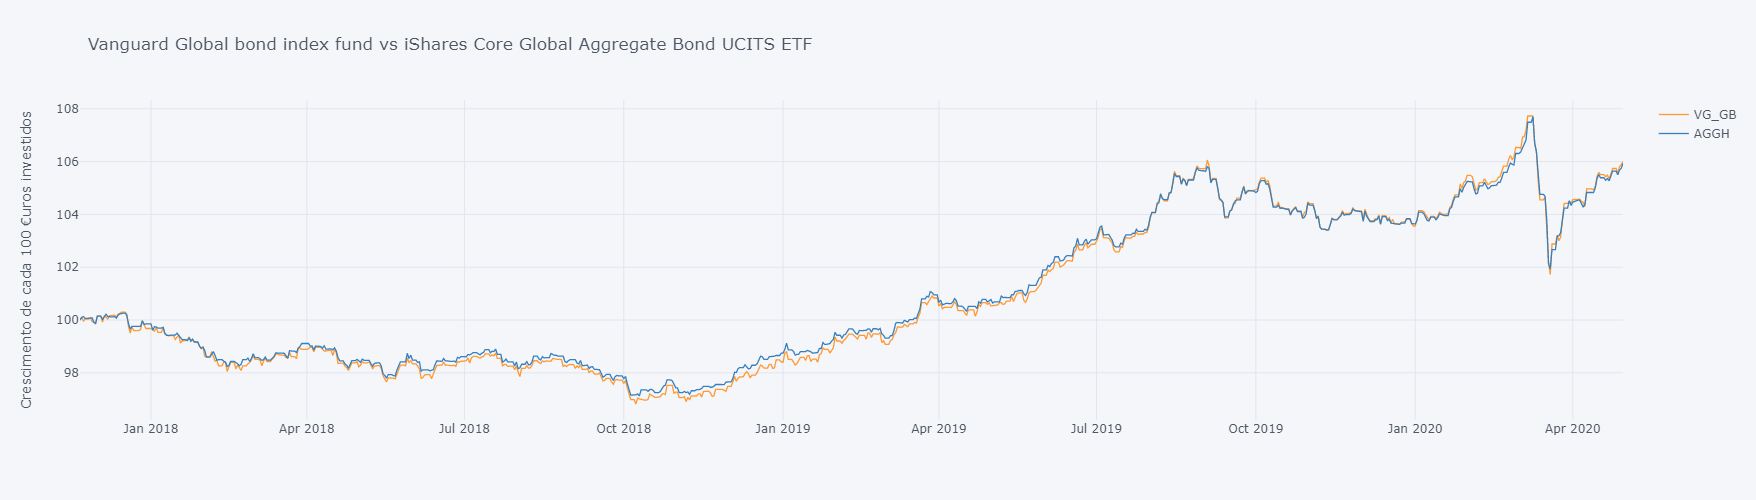

In [16]:
fundos.iplot(dimensions=pa.dimensions, title = 'Vanguard Global bond index fund vs iShares Core Global Aggregate Bond UCITS ETF',
            yTitle='Crescimento de cada 100 €uros investidos')

Os activos parecem ser suficientemente semelhantes para se poder usar qualquer um deles.

## Comparação do Vanguard Global Bond com o Xtrackers II Global Government Bond UCITS ETF 1C - EUR Hedged

In [38]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers =  ['DBZB.XETRA']

ETFs = pd.DataFrame()

# Download
for ticker in Tickers:
    url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
    ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
    ETFs = ETFs.merge(ETF, left_index = True, right_index = True, how='outer')
    
ETFs.columns = Tickers
ETFs = ETFs.fillna(method='ffill')
ETFs = ETFs.replace(to_replace=0, method='ffill')
ETFs.columns = ['DBZB']

In [39]:
ISINs = ['IE00BGCZ0933']
Nomes = ['VG_GB']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

fundos = pa.merge_time_series(ETFs, fundos, how='inner')
fundos = pa.normalize(fundos)

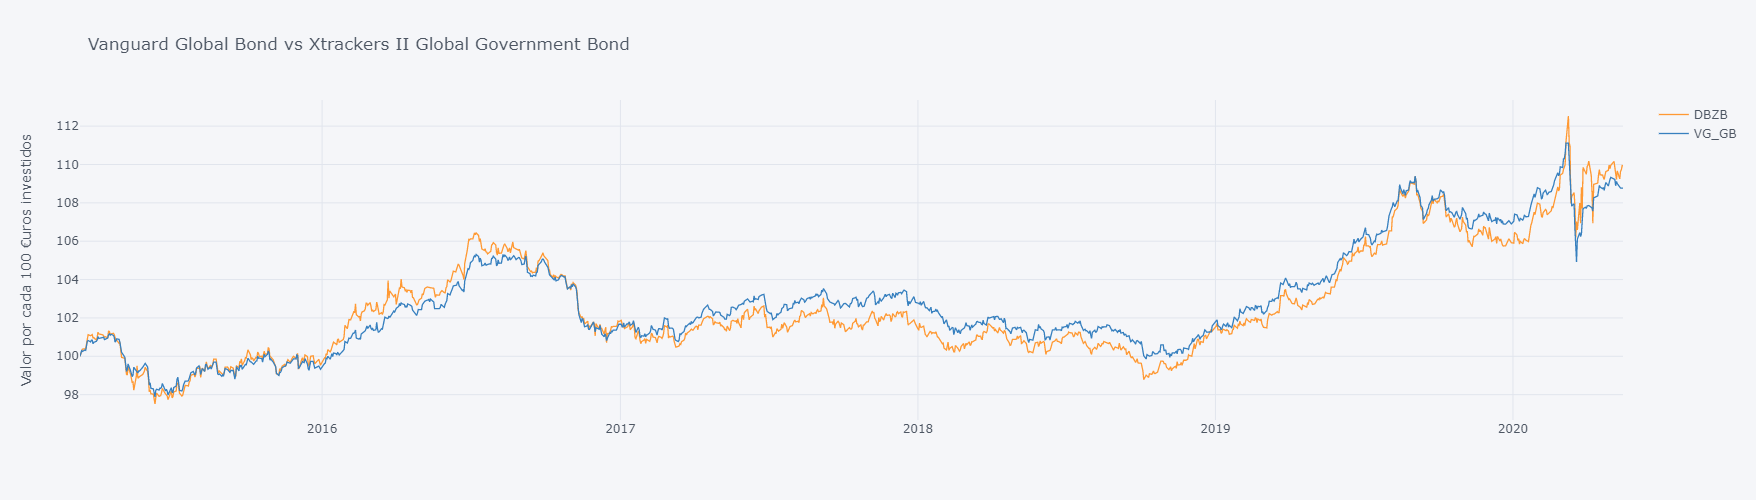

In [46]:
fundos.iplot(dimensions=pa.dimensions,
             title= 'Vanguard Global Bond vs Xtrackers II Global Government Bond',
             yTitle='Valor por cada 100 €uros investidos')

Tal como na comparação anterior os activos parecem ser suficientemente semelhantes para se poder usar qualquer um deles. Embora, ao contrário dos anteriores, devido ao benchmark não ser o mesmo, a probabilidade de haver desvios no futuro é maior. Pode-se ver isso pelo tracking error ser maior nesta segunda comparação. Tracking error é simplesmente haver um spread maior entre eles. Quanto mais um activo se sobrepõe ao outro menor o tracking error.

In [17]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF